## Model 4: Let's try to reduce overfitting
In this notebook, we focus on reducing overfitting by implementing Dropout and data augmentation, to make the model more robust to unseen data.


## Load modules

In [1]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import L1L2

import helpers

## Load dataset

In [58]:
# Load CIFAR-10 dataset
x_train, y_train, x_test, y_test = helpers.load_dataset()

# augmentate data
datagen = helpers.data_augmentation(x_train)

## Model architecture

In [22]:
# let's add dropout and L1L2 regularisation to our model

# testing adding regularisation to the model, did not bring any noticeable improvement
l1l2_reg = L1L2(l1=1e-5, l2=1e-4)

input_shape = x_train.shape[1:]

model = Sequential()
model.add(Input(shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l1l2_reg))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l1l2_reg))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l1l2_reg))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l1l2_reg))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l1l2_reg))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l1l2_reg))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l1l2_reg))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_18 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_19 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [23]:
adam_opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])

# implement callbacks
# lr_schedule = LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 20))
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# train model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64), 
    epochs=50, 
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)



Epoch 1/50
782/782 [==============================] - 42s 45ms/step - loss: 2.2520 - accuracy: 0.3819 - val_loss: 1.9011 - val_accuracy: 0.4906 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 33s 42ms/step - loss: 1.7537 - accuracy: 0.5414 - val_loss: 3.0166 - val_accuracy: 0.4465 - lr: 8.9125e-04
Epoch 3/50
782/782 [==============================] - 34s 43ms/step - loss: 1.4972 - accuracy: 0.6353 - val_loss: 1.2957 - val_accuracy: 0.7014 - lr: 7.9433e-04
Epoch 4/50
782/782 [==============================] - 34s 43ms/step - loss: 1.3549 - accuracy: 0.6899 - val_loss: 1.2003 - val_accuracy: 0.7468 - lr: 7.0795e-04
Epoch 5/50
782/782 [==============================] - 34s 43ms/step - loss: 1.2656 - accuracy: 0.7339 - val_loss: 1.1255 - val_accuracy: 0.7826 - lr: 6.3096e-04
Epoch 6/50
782/782 [==============================] - 35s 45ms/step - loss: 1.1890 - accuracy: 0.7672 - val_loss: 1.1515 - val_accuracy: 0.7834 - lr: 5.6234e-04
Epoch 7/50
782/782 [==================

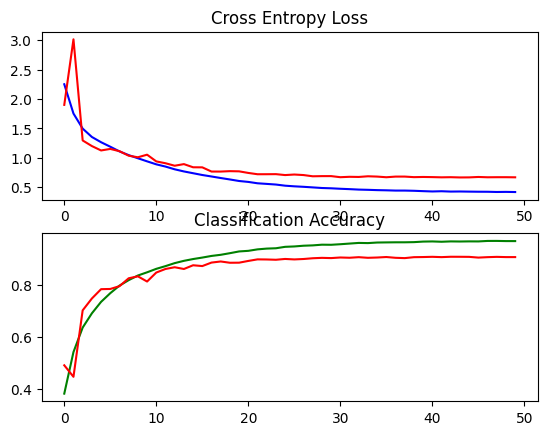

313/313 [==============================] - 2s 8ms/step - loss: 0.6685 - accuracy: 0.9056
Model Loss: 0.6684737205505371
Model Accuracy: 0.9056000113487244
313/313 [==============================] - 1s 4ms/step


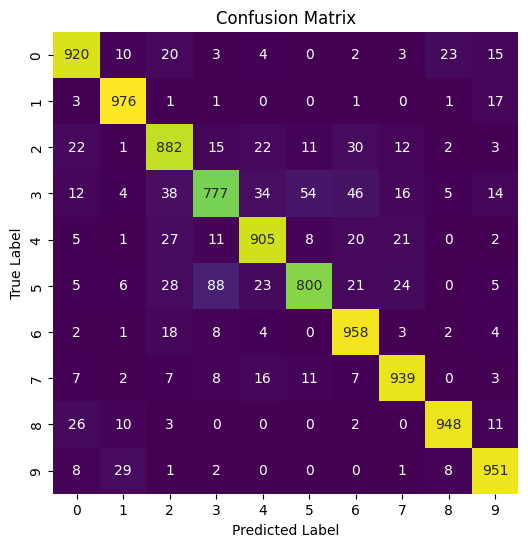

In [24]:
# plot results
helpers.evaluate_model(model, x_test, y_test)
helpers.plot_model_history(history)
helpers.plot_confusion_matrix(model, x_test, y_test)

## Conclusion
Model 4 is a perfect example of how important it is to implement methods to reduce overfitting. By introducing data augmentation (presenting variations of the same picture to our model), Dropout layers and EarlyStopping callback (stopping the training when the test accuracy score is not improving anymore), we managed to gain another 10% on our final test accuracy score. The confusion matrix shows an even distribution along the diagonal, with just minor misclassifications between similar classes (cats and dogs for instance).

These are the last steps we tried building a CNN from scratch, implementing a simpler version of the VGG16 architecture with blocks of convolutional layers. It is good to see that such a model, still quite rudimentary compared to VGG16 or ResNet50, is able to reach such a high score.